Importing the  required modules

In [ ]:
!pip install keras.utils

In [1]:
import os

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import tensorflow

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score,plot_roc_curve

from keras.preprocessing import image
from keras.applications import vgg16
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

Importing Caltech10 dataset

In [2]:
# Unzipping the dataset
import shutil
shutil.unpack_archive("/content/101_ObjectCategories.tar.gz","/content/data")

In [4]:
# Reading the contents

root = '/content/data/101_ObjectCategories' #specify the path to the root folder
#exclude = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']
include = ['beaver','bass','cannon','emu','kangaroo','lotus','snoopy','starfish','revolver','wrench']
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
#categories = [c for c in categories if c  not in [os.path.join(root, e) for e in exclude]]
categories = [c for c in categories if c   in [os.path.join(root, i) for i in include]]

print(categories)



['/content/data/101_ObjectCategories/revolver', '/content/data/101_ObjectCategories/kangaroo', '/content/data/101_ObjectCategories/bass', '/content/data/101_ObjectCategories/wrench', '/content/data/101_ObjectCategories/beaver', '/content/data/101_ObjectCategories/emu', '/content/data/101_ObjectCategories/cannon', '/content/data/101_ObjectCategories/snoopy', '/content/data/101_ObjectCategories/starfish', '/content/data/101_ObjectCategories/lotus']


In [5]:
# Getting the images

def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
   # print(img)
    x = image.img_to_array(img)
  #  x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [6]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
             in os.walk(category) for f in filenames 
             if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    print(images)
    for img_path in images:
        x = get_image(img_path)
        data.append({'x':x,'y':c})
print(x.shape)
print(data)

# count the number of classes
num_classes = len(categories)
print(num_classes)

Streaming output truncated to the last 5000 lines.
       [[ -96.939   , -106.779   ,  -99.68    ],
        [ -96.939   , -106.779   ,  -99.68    ],
        [ -96.939   , -109.779   , -100.68    ],
        ...,
        [ -27.939003,  -40.779   ,  -53.68    ],
        [ -25.939003,  -39.779   ,  -50.68    ],
        [ -80.939   ,  -92.779   , -101.68    ]]], dtype=float32), 'y': 8}, {'x': array([[[88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ],
        ...,
        [88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ]],

       [[88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ],
        ...,
        [88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ]],

       [[88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ],
        [88.061, 75.221, 68.32 ],
        ...,
        [88.061, 75.221, 68.32 ],
        [88.061, 75.22

In [7]:
#Shuffling the data
random.shuffle(data)



In [8]:
#Splitting into train,test and validation
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

print(train)

[{'x': array([[[-39.939003 , -40.779    ,  -7.6800003],
        [-36.939003 , -37.779    ,  -4.6800003],
        [-34.939003 , -35.779    ,  -2.6800003],
        ...,
        [ 37.060997 ,  46.221    ,  74.32     ],
        [ 26.060997 ,  35.221    ,  64.32     ],
        [ 18.060997 ,  27.221    ,  56.32     ]],

       [[-24.939003 , -25.779    ,   7.3199997],
        [-29.939003 , -30.779    ,   2.3199997],
        [-32.939003 , -33.779    ,  -0.6800003],
        ...,
        [ 49.060997 ,  58.221    ,  87.32     ],
        [ 32.060997 ,  41.221    ,  70.32     ],
        [ 31.060997 ,  41.221    ,  72.32     ]],

       [[-20.939003 , -21.779    ,  11.32     ],
        [-24.939003 , -25.779    ,   7.3199997],
        [-28.939003 , -29.779    ,   3.3199997],
        ...,
        [ 46.060997 ,  55.221    ,  84.32     ],
        [ 20.060997 ,  30.221    ,  61.32     ],
        [  9.060997 ,  19.221    ,  50.32     ]],

       ...,

       [[-65.939    , -70.779    , -47.68     ],
    

In [9]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[1, 9, 8, 0, 9, 1, 4, 5, 0, 0, 8, 6, 8, 8, 3, 9, 0, 8, 9, 8, 8, 5, 3, 2, 1, 8, 5, 0, 5, 5, 0, 2, 0, 5, 1, 8, 0, 4, 8, 4, 0, 0, 8, 7, 0, 2, 9, 0, 5, 1, 0, 2, 3, 5, 1, 6, 8, 1, 1, 2, 0, 1, 3, 8, 0, 8, 1, 2, 9, 1, 1, 8, 9, 1, 4, 0, 3, 1, 2, 8, 7, 1, 8, 0, 5, 0, 0, 2, 6]


In [10]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(89, 10)


In [11]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)
print("validation data shape:",x_val.shape)


finished loading 590 images from 10 categories
train / validation / test split: 413, 88, 89
training data shape:  (413, 224, 224, 3)
training labels shape:  (413, 10)
validation data shape: (88, 224, 224, 3)


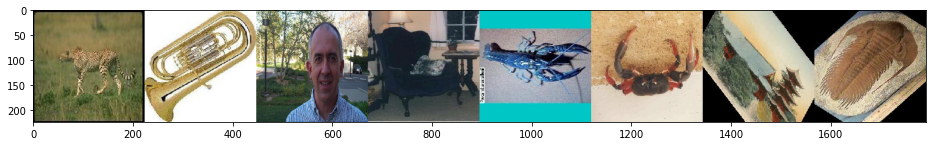

In [12]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))

plt.imshow(concat_image)

In [13]:
# build the network

#x_train.reshape(x_train.shape[0],224,224,3)
Input_shape=(224,224,3)
model = Sequential()
#print("Input dimensions: ",Input_shape)

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 32)        0

In [14]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
4/4 [==============================] - 26s 5s/step - loss: 2.2933 - accuracy: 0.1114 - val_loss: 2.2413 - val_accuracy: 0.1818
Epoch 2/10
4/4 [==============================] - 23s 5s/step - loss: 2.2172 - accuracy: 0.1985 - val_loss: 2.1616 - val_accuracy: 0.1818
Epoch 3/10
4/4 [==============================] - 22s 5s/step - loss: 2.0932 - accuracy: 0.2567 - val_loss: 2.0381 - val_accuracy: 0.2727
Epoch 4/10
4/4 [==============================] - 23s 5s/step - loss: 1.9889 - accuracy: 0.3075 - val_loss: 1.8787 - val_accuracy: 0.3864
Epoch 5/10
4/4 [==============================] - 22s 5s/step - loss: 1.8905 - accuracy: 0.3487 - val_loss: 1.8181 - val_accuracy: 0.3977
Epoch 6/10
4/4 [==============================] - 22s 5s/step - loss: 1.7847 - accuracy: 0.4068 - val_loss: 1.7141 - val_accuracy: 0.4773
Epoch 7/10
4/4 [==============================] - 23s 5s/step - loss: 1.7008 - accuracy: 0.4286 - val_loss: 1.6978 - val_accuracy: 0.5341
Epoch 8/10
4/4 [==================

(0.0, 1.0)

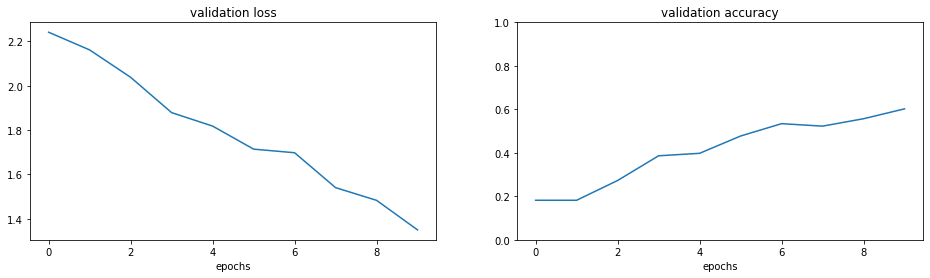

In [15]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

In [16]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.4082257747650146
Test accuracy: 0.5393258333206177


In [17]:
#downloading vgg16
vgg = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [25]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
# make all layers untrainable by freezing weights (except for  last two layers)
for l, layer in enumerate(model_new.layers[:-2]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-2:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
 #make all layers untrainable by freezing weights (except for  last three layers)
for l, layer in enumerate(model_new.layers[:-3]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-3:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

In [ ]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(x_val, y_val))


Epoch 1/10
4/4 [==============================] - 224s 55s/step - loss: 42.1482 - accuracy: 0.3487 - val_loss: 85.1904 - val_accuracy: 0.1023
Epoch 2/10
4/4 [==============================] - 222s 55s/step - loss: 63.5275 - accuracy: 0.1985 - val_loss: 49.9744 - val_accuracy: 0.1023
Epoch 3/10
4/4 [==============================] - 223s 55s/step - loss: 43.4400 - accuracy: 0.1429 - val_loss: 31.3729 - val_accuracy: 0.1023
Epoch 4/10
4/4 [==============================] - 222s 55s/step - loss: 22.9673 - accuracy: 0.1816 - val_loss: 25.5334 - val_accuracy: 0.2386
Epoch 5/10
4/4 [==============================] - 222s 55s/step - loss: 21.9810 - accuracy: 0.2906 - val_loss: 15.6874 - val_accuracy: 0.4659
Epoch 6/10
4/4 [==============================] - 222s 55s/step - loss: 12.4647 - accuracy: 0.4068 - val_loss: 7.2392 - val_accuracy: 0.3182
Epoch 7/10


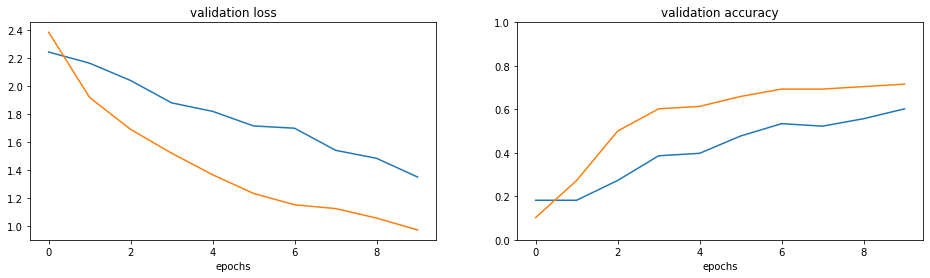

In [21]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [22]:
from sklearn.metrics import  classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

rounded_predictions = model_new.predict(x_test,batch_size=64,verbose=0)
y_pred_bool = np.argmax(y_pred,axis=1)

import numpy as np
rounded_labels=np.argmax(y_pred_bools, axis=1)
rounded_labels[1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm
print(classification_report(y_test,y_pred_bool))
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)
#print('F1 Score',model_new.f1_score(x_test,y_test))
#metrics.plot_roc_curve(model_new,x_test,y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

2/2 [==============================] - 40s 11s/step


ValueError: ignored

In [ ]:
# ReInitializing the last three layers and training the new model

from keras import initializers
inp = vgg.input


initializer = initializers.RandomNormal(mean=0., stddev=1.)
layer_fc1 = Dense(4096, kernel_initializer=initializer)

layer_fc2 = Dense(4096, kernel_initializer=initializer)

layer_predicition = Dense(97, kernel_initializer=initializer)

output1 = layer_fc1(vgg.layers[-4].output)
model_new = Model(inp, out)

output2 = layer_fc2(vgg.layers[-3].output)
model_new = Model(inp, out_1)


output3 = layer_predicition(vgg.layers[-2].output)
model_new = Model(inp, out_2)

